In [27]:
import arcpy
arcpy.env.overwriteOutput = True
arcpy.GetInstallInfo()

{'LicenseLevel': 'Advanced', 'InstallDir': 'c:\\arcgis\\', 'Installer': 'kevi6890', 'ProductName': 'ArcGISPro', 'Version': '2.6', 'SourceDir': 'C:\\Users\\kevi6890\\Documents\\ArcGIS Pro 2.6\\ArcGISPro\\', 'InstallType': 'N/A', 'BuildNumber': '24783', 'InstallDate': '9/24/2020', 'InstallTime': '8:23:55', 'SPNumber': 'N/A', 'SPBuild': 'N/A'}

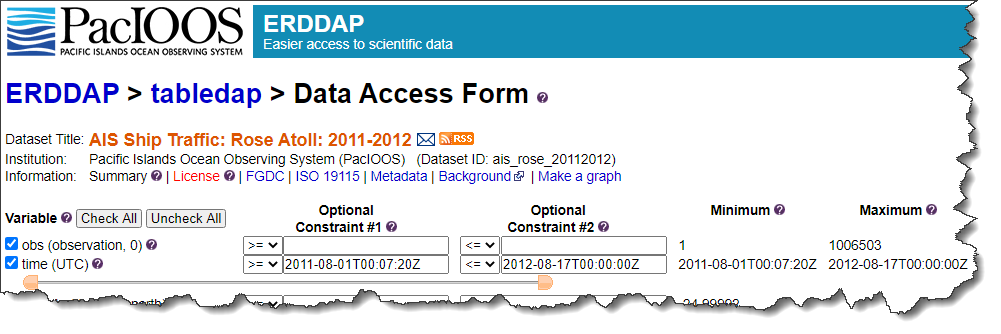

What size data are we dealing with?

In [28]:
lyrfile = 'AIS'
result = arcpy.management.GetCount(lyrfile)
print('{} has {} records'.format(lyrfile, result[0]))

AIS has 3957054 records


Explore volume of ship traffic across time

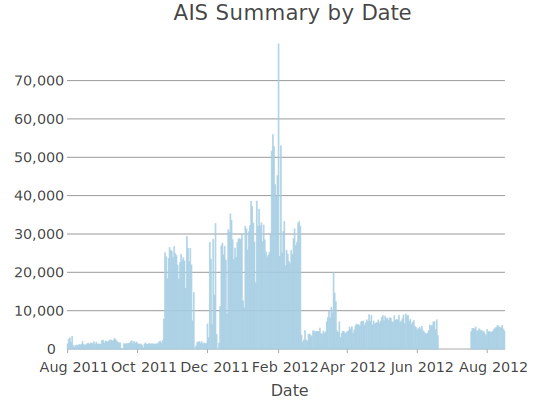

In [29]:
c = arcpy.Chart('AIS Summary')
c.type = 'bar'
c.title = 'AIS Summary by Date'
c.xAxis.field = 'Date'
c.bar.aggregation = 'COUNT'

c.dataSource = lyrfile
c

Too many points. Let's aggregate to hexagons.  Aggregate using one of the Apache Spark enabled tools.

In [30]:
with arcpy.EnvManager(parallelProcessingFactor='100%'):
    arcpy.gapro.AggregatePoints("AIS", r"D:\Demos\IOOS\IOOS Python.gdb\AIS_AggregatePoints", 
                                "BIN", None, "HEXAGON", "100 Kilometers", None, None, None, "obs COUNT")

In [ ]:
arcpy.ListEnvironments()